In [8]:
!pip install kaggle

from google.colab import files
files.upload()  # Select your kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashutosh12503","key":"5046c0037f46603191e5591d1d628acd"}'}

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle datasets download -d techsash/waste-classification-data


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 90% 385M/427M [00:01<00:00, 273MB/s]
100% 427M/427M [00:01<00:00, 279MB/s]


In [11]:
!unzip waste-classification-data.zip -d waste_classification


Streaming output truncated to the last 5000 lines.
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: waste_classifica

In [12]:
import os
print(os.listdir('/content/waste_classification'))
print(os.listdir('/content/waste_classification/DATASET'))


['dataset', 'DATASET']
['TEST', 'TRAIN']


In [13]:
train_path = '/content/waste_classification/DATASET/TRAIN'
test_path = '/content/waste_classification/DATASET/TEST'


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode='binary')


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 56s 69ms/step - accuracy: 0.7658 - loss: 0.5688 - val_accuracy: 0.8739 - val_loss: 0.3367
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8453 - loss: 0.3623 - val_accuracy: 0.8993 - val_loss: 0.2735
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8640 - loss: 0.3282 - val_accuracy: 0.8918 - val_loss: 0.2793
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8838 - loss: 0.2831 - val_accuracy: 0.8540 - val_loss: 0.3736
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.9070 - loss: 0.2354 - val_accuracy: 0.8798 - val_loss: 0.3341
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.9330 - loss: 0.1777 - val_accuracy: 0.8719 - val_loss: 0.3893
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.9502 - loss: 0.1281 - val_accuracy: 0.8667 - val_loss: 0.5723
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.9680 - loss: 0.0884 - val_accurac

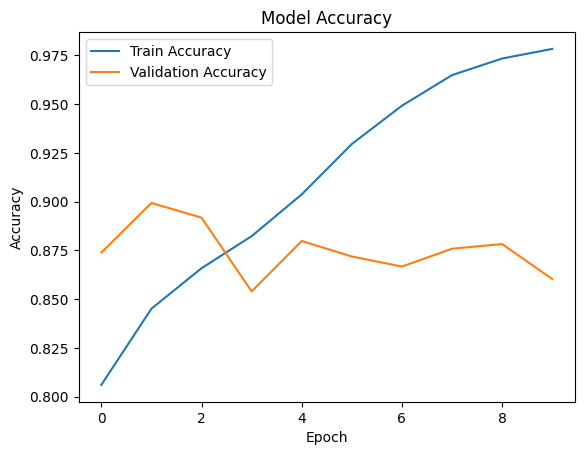

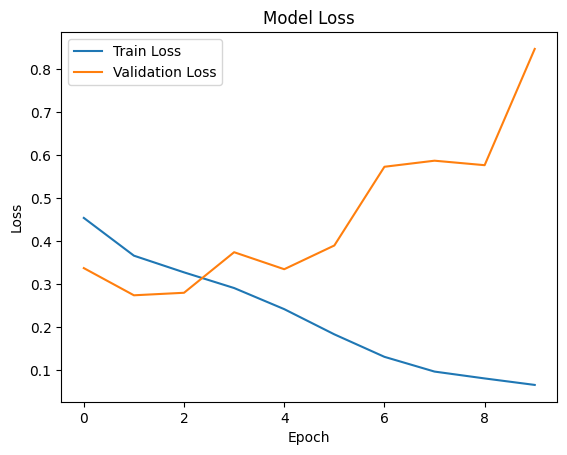

In [17]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
model.save('/content/waste_classification_cnn.h5')
print("✅ Model saved as waste_classification_cnn.h5")


✅ Model saved as waste_classification_cnn.h5


In [19]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

test_set.reset()
y_pred = model.predict(test_set)
y_pred = np.where(y_pred > 0.5, 1, 0)

print(classification_report(test_set.classes, y_pred, target_names=['Organic', 'Recyclable']))
print(confusion_matrix(test_set.classes, y_pred))


79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
              precision    recall  f1-score   support

     Organic       0.54      0.64      0.59      1401
  Recyclable       0.41      0.32      0.36      1112

    accuracy                           0.50      2513
   macro avg       0.48      0.48      0.47      2513
weighted avg       0.49      0.50      0.49      2513

[[898 503]
 [756 356]]


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data Augmentation (Random transformations to avoid overfitting)
augmented_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_aug = augmented_train.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

# Early stopping & learning rate control
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Retrain model with augmentation
history_aug = model.fit(
    train_aug,
    validation_data=test_set,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)


Found 22564 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 259s 367ms/step - accuracy: 0.8512 - loss: 0.3866 - val_accuracy: 0.8866 - val_loss: 0.2839 - learning_rate: 0.0010
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 259s 367ms/step - accuracy: 0.8708 - loss: 0.3268 - val_accuracy: 0.9081 - val_loss: 0.2397 - learning_rate: 0.0010
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 261s 369ms/step - accuracy: 0.8776 - loss: 0.3121 - val_accuracy: 0.9065 - val_loss: 0.2542 - learning_rate: 0.0010
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 260s 369ms/step - accuracy: 0.8847 - loss: 0.2906 - val_accuracy: 0.8842 - val_loss: 0.2920 - learning_rate: 0.0010
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 259s 367ms/step - accuracy: 0.8852 - loss: 0.2822 - val_accuracy: 0.9113 - val_loss: 0.2400 - learning_rate: 5.0000e-04


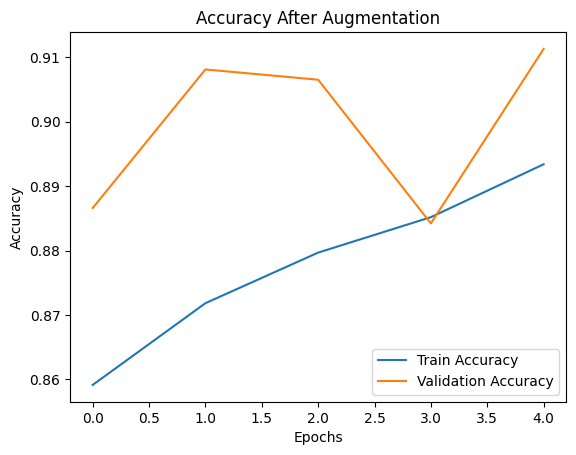

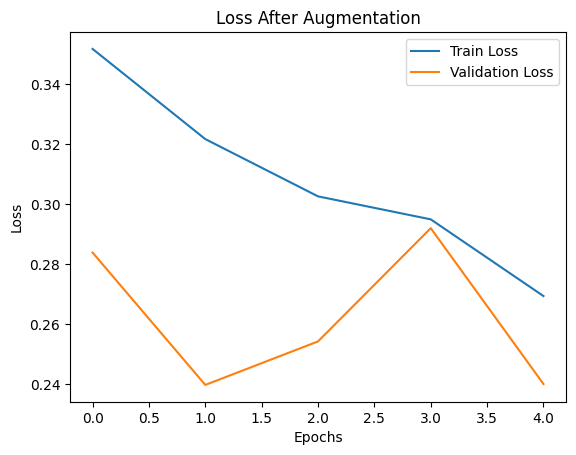

In [21]:
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy After Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.title('Loss After Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
model.save('/content/final_waste_management_model.h5')
print("✅ Final improved model saved!")


✅ Final improved model saved!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')